# Popular Numbers, Part 0: Introduction

While [all numbers are interesting](https://en.wikipedia.org/wiki/Interesting_number_paradox), it seems not all numbers are popular ([Guglielmetti, 2009](https://www.drgoulu.com/2009/04/18/nombres-mineralises/); [Gauvrit, Delahaye, Zenil, 2011](https://arxiv.org/abs/1101.4470)).  This prior research was on the [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/), but is this true for other online math resources?  Is popularity a function of the resource or is it a social construct independent of resource?  In this series, I'll try to answer these questions by looking at the popularity of numbers across a few online math resources.

## History

![Diabicus: The Disco Calculator](images/diabicus-discoing.gif)

Confession: This project actually began as [a disco calculator for a friend's daughter](https://github.com/lipschultz/diabicus) (or, a noisy torture device for the friend -- it's a matter of perspective).  I was inspired by [Sam's Disco Calculator](https://www.youtube.com/watch?v=YfIQ7ktFM1g) from the [standupmaths YouTube channel](https://www.youtube.com/user/standupmaths/).  For each calculation, the calculator would show a fact related to the calculation or result.  I collected these facts from two of my favorite math channels on YouTube: standupmaths and [Numberphile](https://www.youtube.com/user/numberphile/), since they served as the inspiration for the disco calculator (see the [Calculator Unboxing playlist](https://www.youtube.com/playlist?list=PLt5AfwLFPxWKAINNfxIdYmFVKuk_F_cQq)).  Eventually, I realized that I have a bunch of data and it'd be ashame if I didn't explore it.

## About the YouTube Data

Because the disco calculator only included facts from Numberphile and standupmaths, the YouTube data I'll be analyzing only includes those channels.  For simplicity, private and hidden videos aren't included (unless there's an obvious link in a public video).  The analysis includes videos up to December 12, 2017, giving a total of 359 Numberphile videos and 98 standupmaths videos.  There are many other math channels on YouTube, but the data collection and analysis are left as exercises to the reader.

The data used in this analysis can be found: [https://github.com/lipschultz/diabicus/blob/d1b1bb2020c6b6ad8e446dbc7d719efc6155a3c5/resources/youtube.json](https://github.com/lipschultz/diabicus/blob/d1b1bb2020c6b6ad8e446dbc7d719efc6155a3c5/resources/youtube.json)

### Annotations

For each video, I recorded the following information:

- `link` to YouTube video
- `title` of the video
- `host` (or hosts) talking about the math/number(s) in the video, but not necessarily everyone involved in making or appearing in the video (e.g. the hosts for [MENACE: the pile of matchboxes which can learn](https://www.youtube.com/watch?v=R9c-_neaxeU) are just Matt Parker, Matthew Scroggs, and Katie Steckles)
- `date` published
- `source` ("Numberphile", "standupmaths")
- links to any relevant [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/) or [Wikipedia](https://en.wikipedia.org/) page
- A `test` to determine what numbers or calculations are featured in the video. It's a python function that takes a formula, its result, and the context (i.e. calculation history), and returns `True` if the formula, result, or context are relevant to the video.  I chose to use a function instead of recording the set of numbers (as is done in OEIS) since some sets would be very large (e.g. set of all integers).

This analysis suffers from having only one annotator: me.  I have probably been inconsistent in my annotations over the months I watched and annotated videos, and the threshold for a number to "feature" in a video is very vague.  In my defense, I didn't have the foresight to realize I'd be using the data to study number popularity.  I hope you can forgive me for not approaching the data collection with the rigor that data analysis (or a child's toy) truly deserves.

Some guidelines I used for determining whether a number was "featured" in the video:

- If the video is about random numbers or randomness (e.g. [An unexpected way to inflate a balloon](https://www.youtube.com/watch?v=un-pTKfC1dQ)), then the video will match a random number in the range [0, 1) unless a different range is more appropriate.
- When a constant is calculated and the error is mentioned (e.g. [computing pi using pies](https://www.youtube.com/watch?v=ZNiRzZ66YN0)), any number within that error range of the constant is considered "featured" in the video.
- Numbers that show up in illustrative examples do not qualify as being featured in the video
    - e.g. [a video about parabolas](https://www.youtube.com/watch?v=zXoJlRFbktw) will use some numbers as coefficients and x or y values, but those numbers aren't "featured" in the video
    - e.g. the [triplets in Apéry's constant](https://www.youtube.com/watch?v=ur-iLy4z3QE)
- Some videos just aren't obviously about numbers (most of [Tadashi's Toys](https://www.youtube.com/playlist?list=PLt5AfwLFPxWI9eDSJREzp1wvOJsjt23H_) are a good example), so these videos don't match any numbers.
- If a set is talked about (e.g. prime numbers or Fibonnacci sequence) but only some numbers from the sequence are included, "all" numbers in the set are considered featured in the video (well, all numbers up to the max I'm considering in this analysis or up to what's included in OEIS or Wikipedia).
    - If a video is about numbers in general (e.g. [Philosophy of Numbers](https://www.youtube.com/watch?v=vA2cdHLKYB8)), then it features all numbers.
    - If a video is about a kind of number (e.g. [Surreal Numbers (writing the first book)](https://www.youtube.com/watch?v=mPn2AdMH7UQ)), then all numbers of that kind are featured.

I welcome annotations from others to establish inter-rater reliability and improve the overall analysis.

The code for determining whether a number is featured in a video can be found here: [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_popularity.py](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_popularity.py)

## About the OEIS Data

The [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/) is exactly what it claims to be: an online encyclopedia of integer sequences.  No non-integer values occur in the sequences (although sequences can be about non-integer numbers, e.g. [A000796](http://oeis.org/A000796)), nor are there sequences containing imaginary numbers (although sequences can be about imaginary numbers, e.g. [A002410](http://oeis.org/A002410)).

I downloaded the OEIS data on December 15, 2017; it consists of 296 522 sequences ([download link](http://oeis.org/stripped.gz)).  Unlike the data on the videos, OEIS records a list of numbers in the sequence and [generally caps it at about 180 to 210 characters in a sequence (including commas)](http://oeis.org/FAQ.html#Z07b) (On a side note, [thanks to recent changes at Twitter](https://blog.twitter.com/official/en_us/topics/product/2017/tweetingmadeeasier.html), you can now tweet your favorite OEIS sequence in full #tweetOEIS.).  While generating functions in various programming languages are sometimes available, they are not used in this analysis.  Unfortunately, this has the effect of numbers occurring in a sequence, but not being included in OEIS's rendering of the sequence and therefore not being included in this analysis.

[Guglielmetti, 2009](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit, Delahaye, Zenil, 2011](https://arxiv.org/abs/1101.4470) also looked at the popularity of numbers in OEIS, but counted numbers differently.  They counted the total number of occurrences of a number in OEIS.  So if a number occurred more than once in a sequence, it was counted each time.  However, in this series of posts, to be consistent with how I counted numbers in the YouTube videos, I instead count the sequences a number occurs in.  For example, in sequence [A000796](http://oeis.org/A000796) (the digits of Pi), the number `1` occurs nine times.  In prior work, the `1`'s count would increase by nine, while in this analysis it increases by one.

Code for adding the OEIS data to the database of feature numbers can be found here: [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_oeis_popularity.py](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_oeis_popularity.py)

## Counting Numbers

While studying the popularity of all numbers would be interesting, time and space constraints limit the set of numbers to consider.   Drawing from previous work on the popularity of integers in OEIS (see [Sloane's Gap](https://www.youtube.com/watch?v=_YysNM2JoFo)), bounds were set at [-10000, +10001) for both real and imaginary numbers.  Along the real axis (a + 0i) and the imaginary axis (0 + bi), I take 0.01-step increments.  For all other complex numbers (a + bi, for a, b != 0), I take unit steps for both a and b.

## Featured Figures and Future Figuring

Important numbers for today's post:

- 359 Numberphile videos annotated
- 98 standupmaths videos annotated
- 1 annotator for videos
- 296 522 OEIS sequences included

With the introduction and overview out of the way, next time I'll take a look at the data and attempt to replicate the prior findings on OEIS.

# Popular Numbers, Part 1: Popularity of Positive Rationals in OEIS

In this series, we're looking at the popularity of numbers in various online math resources.  Previously, I reviewed the data being used in this analysis.  In this part, I'll finally start doing some analysis!  I'll start with a quick overview of the popularity of numbers across the sources, then I'll dive into the OEIS data by trying to replicate the results in the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470) ([Numberphile video on the topic](https://www.youtube.com/watch?v=_YysNM2JoFo)).

## Loading Data

Let's assume that the scripts from [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/) have been used to save the data into a database.  First I load all the positive rational data.

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/data.db')
df_positive_rational = pd.read_sql_query('''SELECT V.source, C.real_part AS number, COUNT(*) AS count
                                            FROM counts C, videos V
                                            WHERE C.imag_part == 0 AND
                                                  C.video_id = V.video_id AND
                                                  0 <= C.real_part AND
                                                  C.real_part <= 10000
                                            GROUP BY V.source, C.real_part''',
                                         conn)

Each source has a different number of videos/sequences, from 98 with standupmaths to 296 522 with OEIS.  Brady, Matt: if you just increase your output to about 81 videos/day, you should be able to catch up in only 10 years -- get on it! (please). In the meantime, I need to normalize by the number of videos/sequences, which the code below does (saving it in a new column named `pct`).

In [2]:
df_source = pd.read_sql_query('''SELECT source, COUNT(*) as total
                                 FROM videos
                                 GROUP BY source''',
                              conn, index_col='source')
source_totals = df_source['total'].to_dict()
df_positive_rational['pct'] = df_positive_rational.apply(lambda row: row['count']/source_totals[row['source']], axis=1)

## Qualitative Comparison of Sources

With the data loaded, I couldn't wait to see what the popularities look like!

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams["figure.figsize"] = (18, 9)

colors = {'Numberphile': '#603913', 'standupmaths': '#e79300', 'OEIS': '#ff0000'}

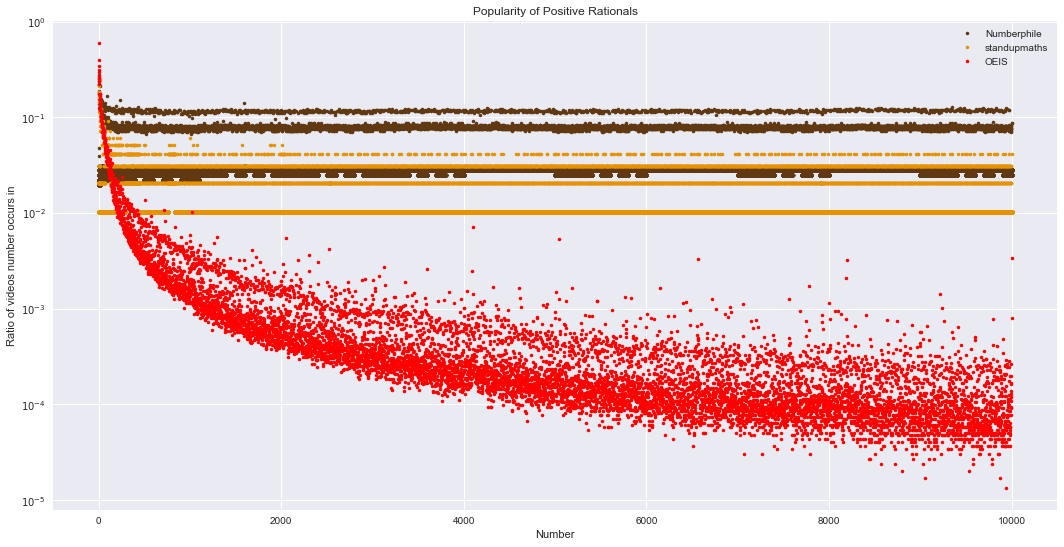

In [4]:
for source, color in colors.items():
    d = df_positive_rational[df_positive_rational['source'] == source]
    plt.semilogy(d.number, d['pct'], marker='.', linestyle='', label=source, color=color)

plt.legend()
plt.xlabel('Number')
plt.ylabel('Ratio of videos number occurs in')
plt.title('Popularity of Positive Rationals')
plt.show()

The graph above shows OEIS popularity in red, standupmaths in yellow, and Numberphile in brown.  The y-axis is logscale.  A few interesting things pop out.

The Numberphile and standupmaths plots are mostly straight lines, with a slight curve close to zero.  This is in stark contrast with OEIS, which has a general downward trend throughout the graph.  OEIS might be different because of their length threshold on each sequence -- bigger numbers may be dropped and longer sequences truncated.  However, there may be fundamental differences between OEIS and the two YouTube channels.  The people who decide what numbers/sequences to include are different (OEIS has a panel of mathematicians, Numberphile has Dr. Haran and mathematicians, standupmaths has Matt Parker and his guests), possibly leading to different focuses.  Of course, I also annotated the YouTube data (and didn't have a second annotator), so this difference might be my fault.

Both Numberphile and standupmaths have very clearly-defined gaps compared to OEIS.  This might be due to just having less videos than OEIS has sequences: more sequences leads to finer granularity between 0% and 100%, allowing for a muddier gap.  Having more sequences also allows for less popular sequences (e.g. [OEIS keywords](http://oeis.org/eishelp2.html#RK) "dumb", "less", or "obsc"), which Numberphile and standupmaths maybe haven't gotten to (yet?).  The same reasons in the previous paragraph could also apply here.

Finally, almost all OEIS data points are below the other two sources.  This is likely because there are just more sequences in OEIS than videos in Numberphile and standupmaths, and each number just shows up in a small percentage of those sequences.

Now let's dive into the details of the specific curves, starting with OEIS!

## Positive Integers in OEIS

In the graph above, notice that the OEIS data is similar to Figure 1 from the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470), which we'd expect since the data is largely identical.  While there is still a noticeable gap, it is less pronounced than in the Sloane's Gap paper.  I suspect the difference is in how we counted occurrences: they count all occurrences of a number, while I counted the sequences a number appears in.

### Curve

The general downward trend of the popularity appears to be a logarithmic curve (as was used in the Sloane's Gap paper).  Fitting a logarithmic curve to the data shows that it is a good fit:

In [5]:
import numpy as np
from scipy import stats

oeis = df_positive_rational[df_positive_rational['source'] == 'OEIS'].copy()

oeis_regression = stats.linregress(np.log(oeis.number[1:]), np.log(oeis['pct'][1:]))
print('OEIS regression:', oeis_regression)
print()
print('popularity = %f * n^%f' % (np.exp(oeis_regression.intercept), oeis_regression.slope))
oeis_best_fit = lambda n: np.exp(oeis_regression.intercept) * n**oeis_regression.slope

OEIS regression: LinregressResult(slope=-1.2936573821919712, intercept=2.50359903761869, rvalue=-0.9184533695224852, pvalue=0.0, stderr=0.0055716551335381285)

popularity = 12.226418 * n^-1.293657


The curve is a very good fit at p ≈ 0.0 and r^2 = 0.84 (compared to r^2 = 0.81 in the Sloane's Gap paper).  The slope/exponent is also very similar to the one found in Sloane's Gap paper (exponent = -1.33).

### Classifying the Popular Numbers

As with the Sloane's Gap paper, I'll empirically determine which numbers are popular.  Two curves will determine popularity for the regions [0, 185) and [185, 500).  For 500 and above, I use the same method as Gauvrit et al.: numbers with a popularity above the 82 percentile within the range [n-c, n+c] are labeled popular; for n <= 1000, c = 100, for n > 1000, c = 350.

In [6]:
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

def line_from_points(point1, point2):
    m = (point1.y - point2.y) / (point1.x - point2.x)
    b = point1.y - m*point1.x
    return m, b

point1 = Point(100, 0.0219296)
point2 = Point(185, 0.0178644)
m1, b1 = line_from_points(point1, point2)
threshold_curve1 = lambda x: m1 * x + b1

point3 = Point(499, 0.00609301)
point2log = Point(*[np.log(p) for p in point2])
point3log = Point(*[np.log(p) for p in point3])
m2, b2 = line_from_points(point2log, point3log)
threshold_curve2 = lambda x: np.exp(b2 + m2 * np.log(x))

is_popular = []
for i in range(len(oeis)):
    number = oeis.iloc[i]['number']
    pct = oeis.iloc[i]['pct']
    if number < 185:
        is_popular.append(pct > threshold_curve1(number))
    elif number < 500:
        is_popular.append(pct > threshold_curve2(number))
    else:
        window_size = 100 if number <= 1000 else 350
        lower_bound = max(0, i-window_size)
        upper_bound = min(i+window_size, len(oeis)-1)
        interval = oeis.iloc[lower_bound:upper_bound+1]
        threshold_pct = interval['pct'].quantile(0.82)
        is_popular.append(pct > threshold_pct)

oeis['popular'] = is_popular

The figure below shows the classified numbers, the two threshold curves, as well as the line of best fit for all the data.  We also see that there are 1964 positive integers in the popular set, 19.6% of all positive integers considered.

Number of popular integers: 1964
Number of unpopular integers: 8037


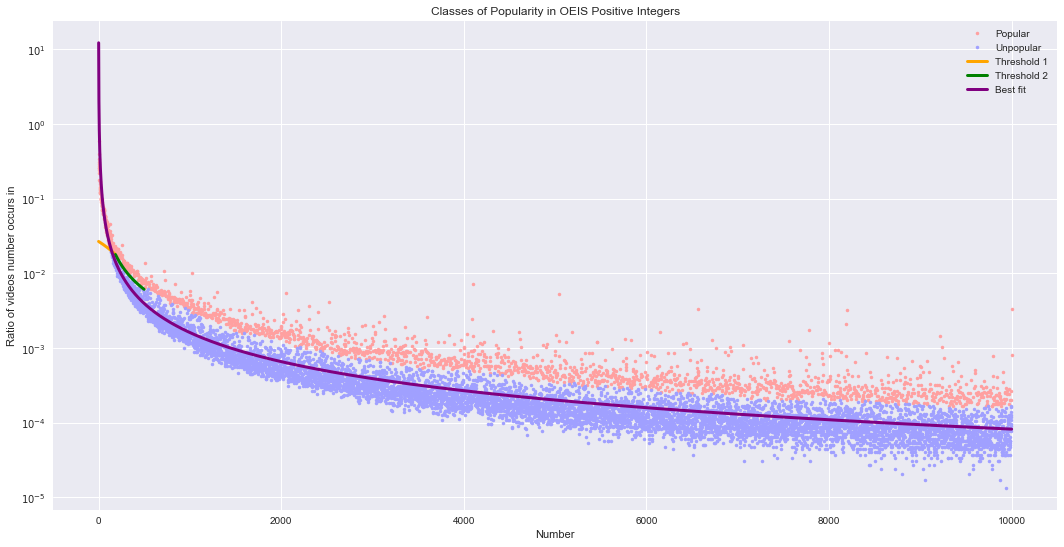

In [7]:
oeis_popular = oeis[oeis.popular]
oeis_regular = oeis[~oeis.popular]

print('Number of popular integers:', len(oeis_popular))
print('Number of unpopular integers:', len(oeis_regular))

plt.semilogy(oeis_popular.number, oeis_popular['pct'], label='Popular', c='#ffa0a0', marker='.', linestyle='')
plt.semilogy(oeis_regular.number, oeis_regular['pct'], label='Unpopular', c='#a0a0ff', marker='.', linestyle='')
x_1 = [x for x in range(0, 185)]
plt.semilogy(x_1, [threshold_curve1(x) for x in x_1], label='Threshold 1', c='orange', marker='', linestyle='-', linewidth=3)
x_2 = [x for x in range(185, 500)]
plt.semilogy(x_2, [threshold_curve2(x) for x in x_2], label='Threshold 2', c='green', marker='', linestyle='-', linewidth=3)
plt.semilogy(oeis.number[1:], oeis.number[1:].apply(oeis_best_fit), label='Best fit', c='purple', marker='', linestyle='-', linewidth=3)
plt.legend()
plt.xlabel('Number')
plt.ylabel('Ratio of videos number occurs in')
plt.title('Classes of Popularity in OEIS Positive Integers')
plt.show()

### Characterizing the Popular Numbers

Now that we've classified the numbers, let's find out who's in the popular class.

Prior work by [Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470) found that the popular positive integers tend to belong to one or more of these sets:
- _primes_: Prime numbers
- _powers_: Numbers of the form a^b (for a,b ∈ **N**)
- _squares_: Square numbers
- _2^n-1_: Numbers one less than a power of 2
- _2^n+1_: Numbers one more than a power of 2
- _highlyComposites_: Guglielmetti defines this as having more divisors than any lower number (i.e. highly composite numbers, see [5040 and other Anti-Prime Numbers](https://www.youtube.com/watch?v=2JM2oImb9Qg))
- _manyPrimeFactors_: Gauvrit et al. defines this as when "the number of prime factors (with their multiplicty) exceeds the 95th percentile, corresponding to the interval [n − 100, n + 100]"

The code below tags each number for whether it belongs to one of those seven sets.  It also creates a new set that's the union of the sets above: _unionPriorWork_.

In [8]:
import sys
sys.path.append('../src')
import numeric_tools


def get_powers_of(base, starting_exponent=2, no_values_above=10000):
    values = []
    exponent = starting_exponent
    value = base ** exponent
    while value <= no_values_above:
        values.append(value)
        exponent += 1
        value = base ** exponent
    return values

def tag_with_prime_set(df):
    df['primes'] = df.number.apply(numeric_tools.is_prime)
    return ['primes']

def tag_with_powers(df, max_num, *, do_power=True, do_square=True, do_power_2_less_1=True, do_power_2_plus_1=True):
    set_names = []
    
    powers = set()
    squares = [1] # To be consistent with Guglielmetti, who includes 1
    base = 2
    base_powers = get_powers_of(base, no_values_above=max_num)
    powers_of_2 = [1] + base_powers
    while len(base_powers) > 0:
        powers.update(base_powers)
        squares.append(base_powers[0])
        base += 1
        base_powers = get_powers_of(base, no_values_above=max_num)
    
    if do_power:
        df['powers'] = df.number.apply(lambda n: n in powers)
        set_names.append('powers')
    
    if do_square:
        df['squares'] = df.number.apply(lambda n: n in squares)
        set_names.append('squares')

    if do_power_2_less_1:
        one_less_than_power_of_two = [n - 1 for n in powers_of_2]
        df['2^n-1'] = df.number.apply(lambda n: n in one_less_than_power_of_two)
        set_names.append('2^n-1')
    
    if do_power_2_plus_1:
        one_more_than_power_of_two = [n + 1 for n in powers_of_2]
        df['2^n+1'] = df.number.apply(lambda n: n in one_more_than_power_of_two)
        set_names.append('2^n+1')
    
    return set_names

def tag_with_highly_composite(df, max_num):
    more_divisors_than_predecessors = [1] # To be consistent with Guglielmetti, who includes 1
    max_divisor_count = 1
    n = 2
    while n <= max_num:
        divisor_count = len(numeric_tools.factors(n, numeric_tools.FACTORS_ALL))
        if divisor_count > max_divisor_count:
            more_divisors_than_predecessors.append(n)
            max_divisor_count = divisor_count
        n += 1
    df['highlyComposites'] = df.number.apply(lambda n: n in more_divisors_than_predecessors)
    return ['highlyComposites']

def tag_with_many_prime_factors(df):
    df['prime_factor_count'] = df.number.apply(lambda n: len(numeric_tools.factors(n, numeric_tools.FACTORS_PRIME)))
    has_many_prime_factors = []
    for i in range(len(df)):
        lower_bound = max(0, i-100)
        upper_bound = min(i+100, len(df)-1)
        interval = df.iloc[lower_bound:upper_bound+1]
        threshold_95pct = interval.prime_factor_count.quantile(0.95)
        has_many_prime_factors.append(df.iloc[i].prime_factor_count > threshold_95pct)
    df['manyPrimeFactors'] = has_many_prime_factors
    return ['manyPrimeFactors']

def tag_with_sets_from_prior_work(df):
    MAX_NUMBER = df.number.max()
    set_names = []
    
    set_names.extend(tag_with_prime_set(df))
    set_names.extend(tag_with_powers(df, MAX_NUMBER))
    set_names.extend(tag_with_highly_composite(df, MAX_NUMBER))
    set_names.extend(tag_with_many_prime_factors(df))
    
    df['unionPriorWork'] = False
    for set_name in set_names:
        df['unionPriorWork'] |= df[set_name]
    set_names.append('unionPriorWork')
    return set_names


prior_work_set_names = tag_with_sets_from_prior_work(oeis)
oeis['popularity class'] = oeis.popular

Now let's look at the results!

Let's consider each of the sets as a classifier -- if a number belongs to the set, then it's predicted to belong to the popular class.  With this view, the authors of the Sloane's Gap paper report precision and recall for _primes_, _squares_, and _manyPrimeFactors_.  They additionally report the negative predictive value for the _primes_, and false omission rate for _squares_ and _manyPrimeFactors_.  They don't report metrics for any of the other sets and the metrics they report are for numbers in the range [301, 10000].  Below, I do some setup to compute the metrics, then report on all of the sets and compute the metrics for numbers in the range [0, 10000].

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from IPython.core.display import display, HTML
    
def get_classification_metrics(df, true_label, pred_label):
    class_values = list(set(df[pred_label].unique()) | set(df[true_label].unique()))
    class_values.sort()
    
    tn, fp, fn, tp = confusion_matrix(df[true_label], df[pred_label]).ravel()
    
    metrics = pd.DataFrame({'predictor': [pred_label]*len(class_values),
                            'class': class_values})
    metrics['precision'] = precision_score(df[true_label], df[pred_label], average=None)
    metrics['recall'] = recall_score(df[true_label], df[pred_label], average=None)
    metrics['f1'] = f1_score(df[true_label], df[pred_label], average=None)
    if len(class_values) == 2:
        p = list(metrics['precision'])
        p.reverse()
        #metrics['negative predictive value'] = p
        #metrics['false omission rate'] = [1-v for v in p]
    metrics['# predicted'] = oeis.groupby(pred_label).count().ix[:, 0].values
    return metrics

def get_classification_metrics_for_all_prediction_labels(df, true_label, pred_label_list):
    metrics = pd.DataFrame()
    for set_name in prior_work_set_names:
        metrics = metrics.append(get_classification_metrics(df, true_label, set_name))
    return metrics

def render_classification_metrics_table(metrics, for_class, sort_by='f1', do_not_color=['predictor', '# predicted']):
    class_metrics = metrics[metrics['class'] == for_class].drop('class', 1)
    class_metrics = class_metrics.sort_values(by=sort_by, ascending=False)
    
    cmap = sns.light_palette("blue", as_cmap=True)
    to_hexcolor = lambda val: '#' + ''.join(['%02x' % int(v*255) for v in cmap(int(val*255))[:-1]])
    
    rows = ['<th>' + '</th><th>'.join(class_metrics.columns.tolist()) + '</th>']
    for i, row in class_metrics.iterrows():
        cells = []
        for col_name, val in row.items():
            style = 'text-align:center;'
            if col_name not in do_not_color:
                style += 'background-color:{color};'.format(color=to_hexcolor(val))
                if val > 0.5:
                    style += 'color:white;'
            if not isinstance(val, str) and (0 <= val <= 1):
                val = '%0.02f' % val
            cell = '<td style="{style}">{value}</td>'.format(style=style, value=val)
            cells.append(cell)
        rows.append(''.join(cells))
                
    rendered_rows = '<tr>' + '</tr><tr>'.join(rows) + '</tr>'
    display(HTML('<table>' + rendered_rows + '</table>'))
    
oeis_class_metrics = get_classification_metrics_for_all_prediction_labels(oeis, 'popularity class', prior_work_set_names)
render_classification_metrics_table(oeis_class_metrics, True)

predictor,precision,recall,f1,# predicted
unionPriorWork,0.91,0.79,0.84,1719
primes,0.98,0.61,0.75,1229
manyPrimeFactors,0.65,0.12,0.21,370
powers,0.94,0.06,0.11,124
squares,0.94,0.05,0.09,100
highlyComposites,1.00,0.01,0.02,18
2^n-1,1.00,0.01,0.01,13
2^n+1,0.92,0.01,0.01,13


The table above shows various metrics for each set.  The table is sorted by f1 and the metrics cells are color-coded by how high their value is (white -> 0, blue -> 1) -- higher is better.

We see that these sets generally have very good precision.  Only _manyPrimeFactors_ has a precision below 0.90, at 0.65.  This is consistent with the Sloane's Gap paper, where they also found very good precision for primes and squares, but poorer precision for having many prime factors.  However, the best precision comes from two sets the authors brushed over, _highlyComposite_ and _2^n-1_, with perfect precision.

Unfortunately, the high precision generally comes at very low recall.  Most of these sets are small, generally being less than 20% the size of the set of popular numbers (earlier, we saw it was 1964).  Only _unionPriorWork_ and _primes_ have a recall over 0.50.  The authors of the Sloane's Gap paper also found _primes_ to have good recall.

### The False Negatives

Combined, these prior work sets include 1719 positive integers, 1556 of them (90.5%) are popular. Earlier, we saw that there are 1964 popular integers in OEIS; 79.2% of them are accounted for by these sets, leaving 408 unaccounted for -- the false negatives.  What are these unaccounted-for popular numbers?

In [10]:
oeis_popular = oeis[oeis.popular]
oeis_popular_accounted = oeis_popular[oeis_popular.unionPriorWork]
oeis_popular_unaccounted = oeis_popular[~oeis_popular.unionPriorWork]

print('Unaccounted:')
print([int(n) for n in oeis_popular_unaccounted.number])
print()

three_repeat_digit = [111, 222, 333, 444, 555, 666, 777, 888, 999]
print('Three-repeat-digit numbers in unaccounted:')
print(oeis_popular_unaccounted[oeis_popular_unaccounted.number.isin(three_repeat_digit)].number.values)
print()

print('Three-repeat-digit numbers in popular:')
print(oeis_popular[oeis_popular.number.isin(three_repeat_digit)].number.values)

Unaccounted:
[6, 10, 14, 18, 20, 21, 22, 26, 28, 30, 34, 35, 38, 39, 40, 42, 44, 45, 46, 48, 50, 51, 52, 54, 55, 56, 57, 58, 62, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 98, 99, 102, 104, 105, 106, 108, 110, 111, 112, 114, 115, 116, 117, 118, 119, 122, 123, 124, 126, 130, 132, 133, 135, 136, 140, 143, 150, 156, 168, 200, 210, 252, 280, 300, 330, 336, 420, 462, 504, 600, 630, 756, 780, 924, 945, 990, 1001, 1100, 1111, 1155, 1176, 1320, 1365, 1430, 1485, 1540, 1560, 1575, 1716, 1729, 1806, 1820, 1848, 1890, 1980, 2002, 2040, 2100, 2145, 2184, 2200, 2205, 2211, 2222, 2310, 2340, 2380, 2450, 2465, 2556, 2584, 2600, 2646, 2701, 2730, 2772, 2821, 2835, 2856, 2925, 2940, 2970, 2992, 3003, 3060, 3080, 3135, 3150, 3192, 3276, 3277, 3280, 3281, 3300, 3321, 3333, 3367, 3432, 3465, 3480, 3570, 3640, 3645, 3720, 3750, 3872, 3876, 3906, 4004, 4005, 4033, 4092, 4094, 4100, 4112, 4116, 4140, 4161, 4180, 4181, 4290, 4369, 4371, 4375, 4410, 4444, 4488, 

Gauvrit et al. suggested that some of these are linked to decimal notation, offering the example that 1111, 2222, ..., 9999 are all in this unaccounted for set.  However, other than those nine numbers, none of them are obviously linked to decimal notation.  For example, of the three-digit version of that sequence, only 111 is in the unaccounted for set (it's also the only one in the popular set).

The graph below shows where the unaccounted for popular numbers fall within the OEIS popularity graph.  It seems many of them occur for smaller numbers, before a clear gap begins to appear.  Point 2 (from the section on classifying popular numbers) is a good marker of where a gap just starts appearing -- shown as an orange dashed line in the graph (x = 185).  Of the 408 unaccounted for integers, 20.1% are below point 2.  Additionally, 52.9% of all popular integers below point 2 are unaccounted for.  Only 1.85% of all integers are below point 2.  Therefore, it seems being smaller is also an indicator for being popular.

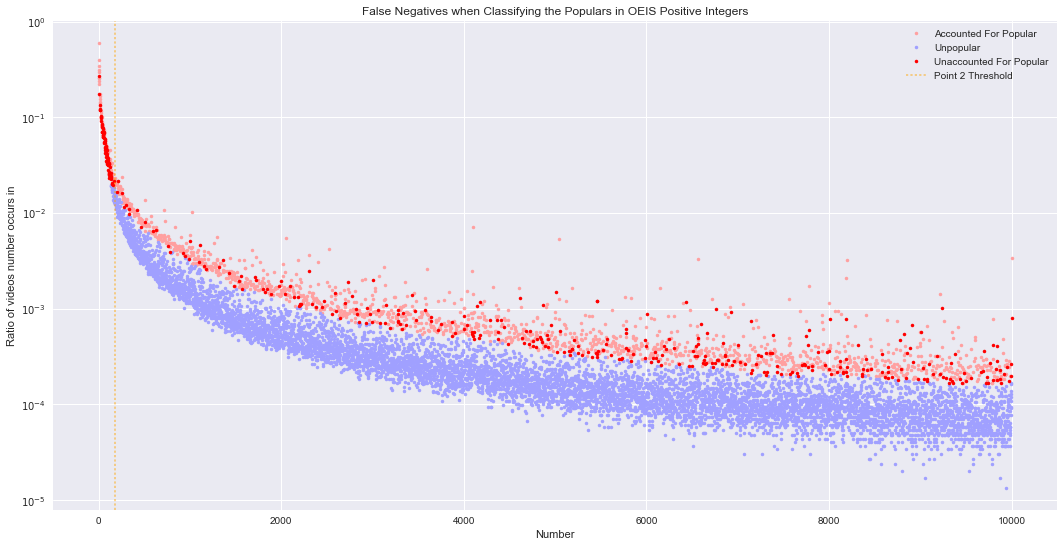

Percent of unaccounted for below point 2: 20.10%
Percent of popular (below point 2) that are unaccounted: 52.90%


In [11]:
plt.semilogy(oeis_popular_accounted.number, oeis_popular_accounted['pct'], c='#ffa0a0', marker='.', linestyle='', label='Accounted For Popular')
plt.semilogy(oeis_regular.number, oeis_regular['pct'], c='#a0a0ff', marker='.', linestyle='', label='Unpopular')
plt.semilogy(oeis_popular_unaccounted.number, oeis_popular_unaccounted['pct'], c='red', marker='.', linestyle='', label='Unaccounted For Popular')
plt.axvline(x=point2.x, linestyle='dotted', color='orange', alpha=0.5, label='Point 2 Threshold')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Ratio of videos number occurs in')
plt.title('False Negatives when Classifying the Populars in OEIS Positive Integers')
plt.show()

count_unaccounted_below_point2 = len([v for v in oeis_popular_unaccounted.number < point2.x if v])
count_all_popular_below_point2 = len([v for v in oeis_popular.number < point2.x if v])
print('Percent of unaccounted for below point 2: %0.2f%%' % (100 * count_unaccounted_below_point2 / len(oeis_popular_unaccounted)))
print('Percent of popular (below point 2) that are unaccounted: %0.2f%%' % (100 * count_unaccounted_below_point2 / count_all_popular_below_point2))

### The False Positives

We took a brief look at the numbers that should have been predicted as popular, but weren't.  Now we'll look at the numbers that were predicted as popular, but shouldn't be (i.e. the false positives).

False positives: (length = 163)
[196, 243, 289, 320, 343, 361, 448, 484, 513, 529, 640, 648, 676, 704, 800, 832, 896, 947, 972, 983, 1056, 1088, 1216, 1248, 1408, 1472, 1568, 1632, 1664, 1699, 1760, 1824, 1856, 1984, 2176, 2208, 2368, 2430, 2432, 2448, 2464, 2496, 2624, 2736, 2752, 2784, 2843, 2912, 2944, 2963, 2976, 3008, 3040, 3083, 3187, 3392, 3402, 3520, 3552, 3564, 3648, 3672, 3712, 3776, 3808, 3904, 3920, 3923, 3936, 4176, 4212, 4256, 4288, 4327, 4363, 4512, 4544, 4576, 4640, 4672, 4736, 4928, 4960, 4968, 4992, 5056, 5088, 5152, 5248, 5312, 5328, 5346, 5472, 5488, 5504, 5508, 5520, 5568, 5664, 5696, 5791, 5808, 5903, 5987, 6016, 6080, 6192, 6208, 6264, 6287, 6318, 6384, 6432, 6464, 6496, 6592, 6688, 6696, 6703, 6784, 6823, 7104, 7232, 7237, 7243, 7296, 7360, 7452, 7552, 7584, 7632, 7643, 7808, 7872, 7904, 7933, 7968, 8096, 8262, 8316, 8352, 8496, 8539, 8544, 8576, 8623, 8768, 8832, 8863, 8896, 8928, 8963, 9024, 9088, 9152, 9280, 9288, 9344, 9396, 9467, 9680, 9743, 9888]



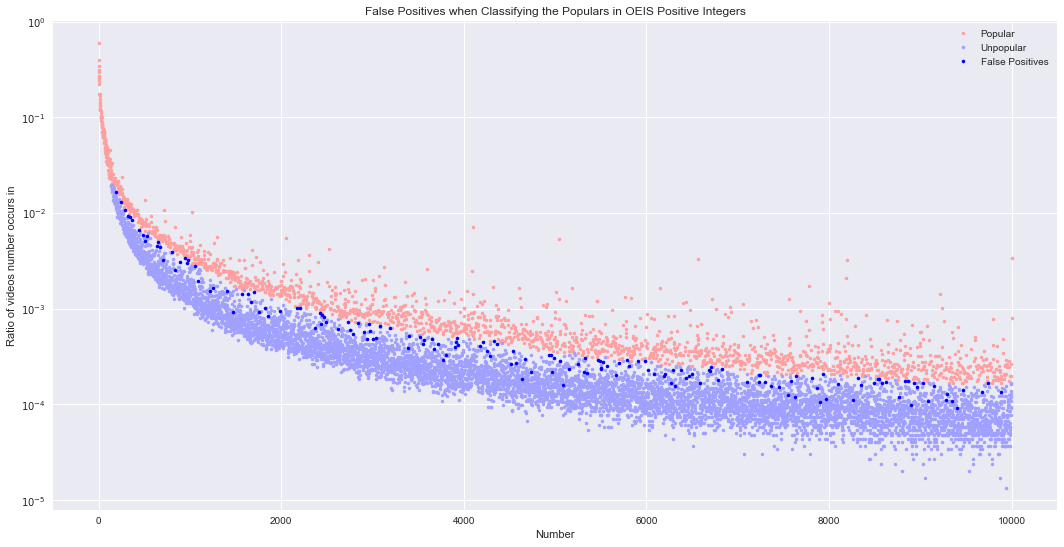

In [12]:
oeis_predicted_popular = oeis[oeis.unionPriorWork]
oeis_true_positve = oeis_predicted_popular[oeis_predicted_popular.popular]
oeis_false_positive = oeis_predicted_popular[~oeis_predicted_popular.popular]

print("False positives: (length = {length})".format(length=len(oeis_false_positive)))
print([int(n) for n in oeis_false_positive.number])
print()

plt.semilogy(oeis_popular.number, oeis_popular['pct'], c='#ffa0a0', marker='.', linestyle='', label='Popular')
plt.semilogy(oeis_regular.number, oeis_regular['pct'], c='#a0a0ff', marker='.', linestyle='', label='Unpopular')
plt.semilogy(oeis_false_positive.number, oeis_false_positive['pct'], c='blue', marker='.', linestyle='', label='False Positives')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Ratio of videos number occurs in')
plt.title('False Positives when Classifying the Populars in OEIS Positive Integers')
plt.show()

Almost all of the false positives fall within the muddy gap.  There are still plenty in the muddy gap that weren't false positives though.  In the future, it might be interesting to try characterizing numbers in the muddy gap.

## The Most Popular

So just who are the most popular positive integers in OEIS?

In [13]:
oeis_sorted = oeis.sort_values(by='pct', ascending=False)
tenth_value = oeis_sorted.iloc[9].pct
print(oeis_sorted[oeis_sorted.pct >= tenth_value][['number', 'count', 'pct']])

         number   count       pct
1000002     1.0  177633  0.599055
1000003     2.0  117126  0.394999
1000004     3.0  102140  0.344460
1000005     4.0   92043  0.310409
1000006     5.0   87105  0.293756
1000007     6.0   79892  0.269430
1000008     7.0   75694  0.255273
1000001     0.0   75597  0.254946
1000009     8.0   71019  0.239507
1000010     9.0   65758  0.221764


It turns out that the ten most popular positive integers in OEIS are zero through nine, mostly in that order -- zero is wedged between seven and eight.  The most popular integer is one, which is 1.5 times more popular than the second number (two).  [Nilsson](https://en.wikipedia.org/wiki/One_(Harry_Nilsson_song)) and [Hutton et al., 1969](https://www.youtube.com/watch?v=d5ab8BOu4LE) conjectured that one was the loneliest number, with two being almost as lonely, but according to OEIS they are actually the most popular!

## Featured Figures and Future Figuring

We covered a lot this time:
- We got our first glimpse of the popularity of positive rationals across the three sources, then took a deep dive into the OEIS positive integers.
- The popularity of OEIS positive integers generally follows: popularity = 12.226418 * n^-1.293657 (similar to the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470))
- We found that being prime, a power, one off of being a power of two, being a square number, or being highly composite are all good indicators of being popular.  Having relatively more prime factors than neighboring numbers can also be an indicator, but isn't as good.
- 20.8% of popular integers don't fall into any of those categories though.  Many of them are just small, before a noticeable gap starts appearing.
- One is the most popular positive integer in OEIS

Overall, I was generally able to replicate the findings from prior work ([Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470)).  Next time, I'll venture into new territory by exploring the Numberphile positive rationals!

# Popular Numbers, Part 2: Numbers on Numberphile
(or, as I've been thinking of it: **The Point Where it Gets Interesting**)

![Dr. Haran pointing at the Numberphile data in a plot of the positive rationals.](images/brady-pointing-positive-rationals.png)

This is the third part in a series examining the popularity of numbers featured in various math resources. Last time, I looked at the popularity of positive integers in OEIS, generally replicating previous work ([Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470)).  This time, I'm going to dive into the unexplored realm of the popularity of positive rationals in [Numberphile videos](https://www.youtube.com/user/numberphile/), a YouTube channel that's "[Videos about numbers - it's that simple.](https://www.youtube.com/user/numberphile/about)".

Last time, we saw a graph of positive rational popularity across OEIS, Numberphile, and standupmaths (shown above with Numberphile creator Dr. Haran pointing at the Numberphile data).  The graph below is just the popularity of positive rationals in Numberphile.

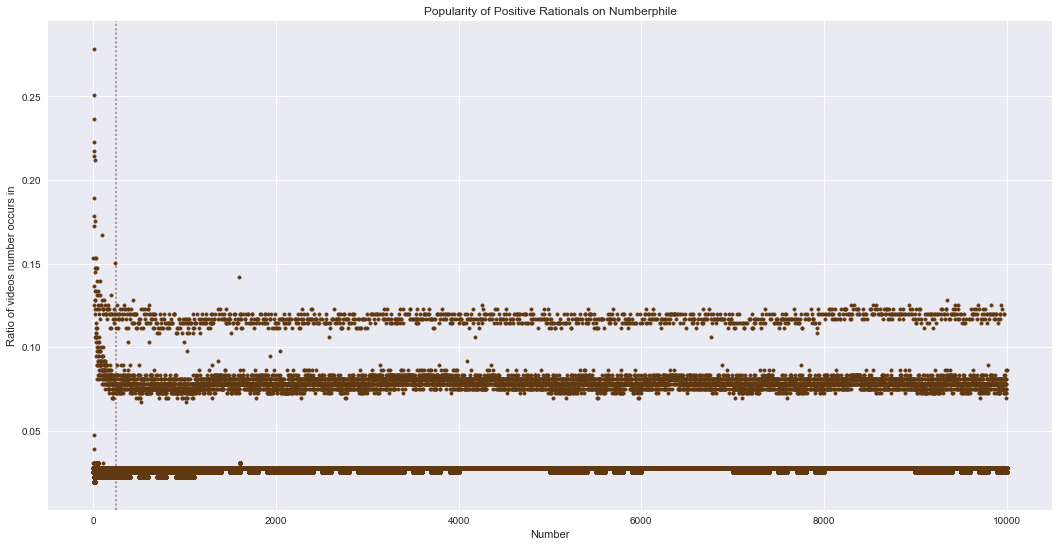

In [14]:
source = 'Numberphile'
numberphile = df_positive_rational[df_positive_rational['source'] == source].copy()

transition_threshold = 250
color = colors[source]
plt.scatter(numberphile.number, numberphile['pct'], marker='.', color=color)
plt.axvline(x=transition_threshold, linestyle='dotted', color=color, alpha=0.5)
plt.xlabel('Number')
plt.ylabel('Ratio of videos number occurs in')
plt.title('Popularity of Positive Rationals on Numberphile')
plt.show()

## Classifying the Popularity

Unlike with the OEIS data, there are very clearly three levels of popularity here: the popular (pct ≈ 0.115), the somewhat popular (pct ≈ 0.078), and the unpopular (pct ≈ 0.025).  This is in contrast to OEIS, with only two levels of popularity and a muddy gap between them.  However, like OEIS, numbers close to zero are relatively more popular than the line they seem to eventually settle into.  I eyeballed the transition point at around number=250 (the dashed line in the graph).

So who's in each popularity level?  First, let's classify them.  For the flat part, a simple kmeans clustering will do.  For the curved part, I use two simple thresholds to classify the unpopular (pct <= 0.06) and the obviously popular (pct >= 0.15).  For the region between the popular and the somewhat popular, I eyeballed a line that seemed to separate the two (similar to what we did last time for OEIS), going from (12.048, 0.118321) down to (250, 0.0965) -- 0.0965 is the average between my initial guesses for the centers of the popular and somewhat popular lines.

Popularity centers for the flat parts:
 [0.11721081 0.07839004 0.02736215]


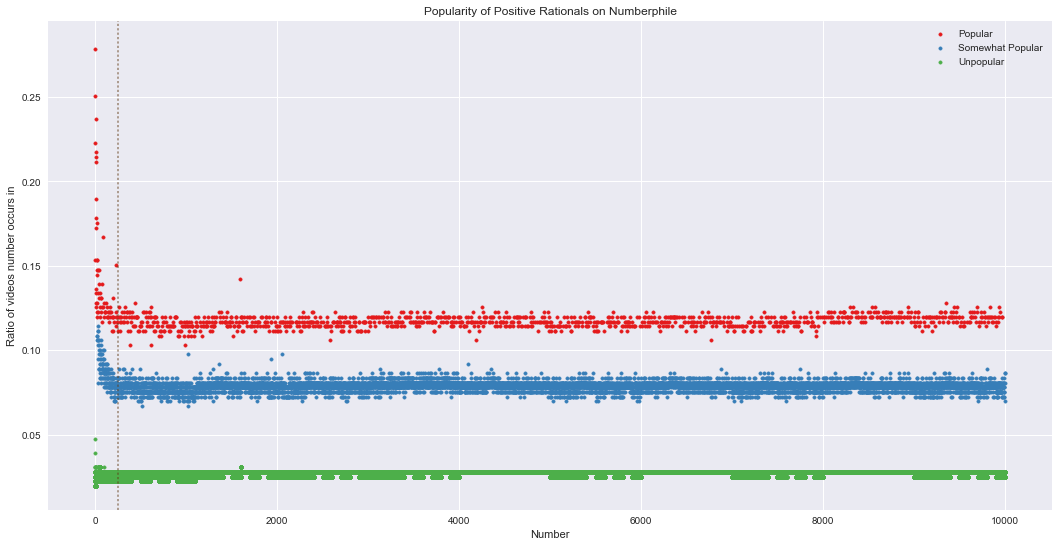

Size of each class:
Class 0
	Size: 1252
	Percent: 0.13%
Class 1
	Size: 8749
	Percent: 0.87%
Class 2
	Size: 990000
	Percent: 99.00%


In [15]:
from scipy.cluster.vq import kmeans2

estimated_popularity_centers = [0.115, 0.078, 0.025]

threshold_index = numberphile.number[numberphile.number == transition_threshold].index[0]
flat_part = numberphile[threshold_index:]
centroids, flat_groups = kmeans2(flat_part.pct, estimated_popularity_centers)
print('Popularity centers for the flat parts:\n', centroids)

curve_part = numberphile[:threshold_index]

def cluster_curved_Numberphile(row):
    if row.pct <= 0.06:
        return 2
    elif row.pct >= 0.15:
        return 0
    else:
        x1, y1 = 12.048, 0.118321
        x2, y2 = 250, (estimated_popularity_centers[0] + estimated_popularity_centers[1])/2
        m = (y1 - y2) / (x1 - x2)
        b = y1 - m * x1
        if row.pct > m * row.number + b:
            return 0
        else:
            return 1

curve_groups = curve_part.apply(cluster_curved_Numberphile, axis='columns')
numberphile['popularity class'] = np.concatenate([curve_groups, flat_groups])
numberphile['popular'] = numberphile['popularity class'].apply(lambda c: c == 0)

numberphile_popular = numberphile[numberphile['popularity class'] == 0]
numberphile_somewhat_popular = numberphile[numberphile['popularity class'] == 1]
numberphile_unpopular = numberphile[numberphile['popularity class'] == 2]

plt.scatter(numberphile_popular.number, numberphile_popular['pct'], marker='.', color=plt.cm.Set1.colors[0], label='Popular')
plt.scatter(numberphile_somewhat_popular.number, numberphile_somewhat_popular['pct'], marker='.', color=plt.cm.Set1.colors[1], label='Somewhat Popular')
plt.scatter(numberphile_unpopular.number, numberphile_unpopular['pct'], marker='.', color=plt.cm.Set1.colors[2], label='Unpopular')
plt.axvline(x=250, linestyle='dotted', color=color, alpha=0.5)
plt.xlabel('Number')
plt.ylabel('Ratio of videos number occurs in')
plt.title('Popularity of Positive Rationals on Numberphile')
plt.legend()
plt.show()

print('Size of each class:')
for i in range(3):
    print('Class', i)
    popularity_class = numberphile[numberphile['popularity class'] == i]
    size = len(popularity_class)
    print('\tSize:', size)
    print('\tPercent: %0.2f%%' % (100 * size / len(numberphile)))
    #print('\tAverage popularity: %0.2f%%' % (100 * popularity_class.mean().pct))

Clusters look good.  Shockingly, 99% of all the positive rationals studied are unpopular (class 2).  What numbers could be so unpopular?

## Characterizing the Unpopular Numbers

I strongly suspect that all the non-integers are in this category since 990000 is exactly how many positive non-integer rationals are included in the analysis.

In [16]:
numberphile_nonintegers = numberphile[numberphile.number % 1 != 0]
print('Classes that non-integers appear in:', numberphile_nonintegers['popularity class'].unique())
print('Total number of non-integers:', len(numberphile_nonintegers))

Classes that non-integers appear in: [2]
Total number of non-integers: 990000


Yep, the unpopular numbers are all the non-integers.  With an average popularity of 2.74%, they are only a quarter as popular as the popular numbers and less than half as popular as the somewhat popular numbers.  On average, they're featured in only about 10 Numberphile videos so far.  Sorry non-integers, but at least you're still [interesting](https://en.wikipedia.org/wiki/Interesting_number_paradox).

The distribution of popularity among the unpopular numbers is:

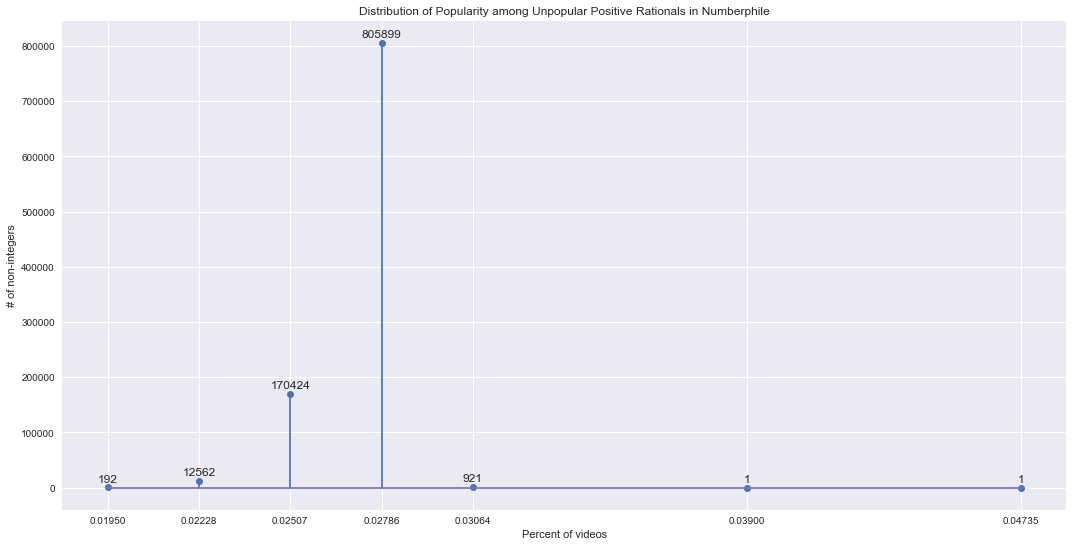

In [17]:
numberphile_unpopular_counts = numberphile_unpopular.groupby('pct').pct.count()
plt.stem(numberphile_unpopular_counts.index.values, numberphile_unpopular_counts.values)
for x, y in numberphile_unpopular_counts.items():
    plt.annotate(y, xy=(x, y+10000), ha='center')

plt.xticks(numberphile_unpopular_counts.index.values)
plt.xlabel('Percent of videos')
plt.ylabel('# of non-integers')
plt.title('Distribution of Popularity among Unpopular Positive Rationals in Numberphile')
plt.show()

Most of the non-integers are between 2.2284% and 2.7855%.  A small but sizeable percentage of numbers occur in only 1.95% of videos (7 videos) and a larger percentage occurring in 3.06% of videos (11 videos).  Interestingly, there are two positive non-integers even higher.

In [18]:
numberphile_unpopular[numberphile_unpopular.pct > 0.035]

,source,number,count,pct,popularity class,popular
25,Numberphile,0.25,14,0.038997,2,False
50,Numberphile,0.50,17,0.047354,2,False


The powers of two!  Powers of two have been observed in the OEIS data to be popular (["La minéralisation des nombres" by Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and in [the previous post of this series](/posts/popular-01-oeis/)) and here we see that even the negative powers of two continue the trend of being popular.  Later in the series, we'll take a closer look at the trend of powers of two.

I'm surprised we didn't see any approximations of popular constants (e.g. 3.14 for pi) pop out among the most popular non-integers.  Later in the series we'll focus on regions around popular constants.  For now, let's move on.

## Characterizing the Popular Numbers

Now that we know what the unpopular numbers are, let's figure out who some of the popular numbers are.  For this analysis, I'll look just at the integers since we already know that all the non-integers are unpopular.  Last time, I drew from previous work by [Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470) to create sets of likely-popular numbers:
- _primes_: Prime numbers
- _powers_: Numbers of the form a^b (for a,b ∈ **N**)
- _squares_: Square numbers
- _2^n-1_: Numbers one less than a power of 2
- _2^n+1_: Numbers one more than a power of 2
- _highlyComposites_: Guglielmetti defines this as having more divisors than any lower number (i.e. highly composite numbers, see [5040 and other Anti-Prime Numbers](https://www.youtube.com/watch?v=2JM2oImb9Qg))
- _manyPrimeFactors_: Gauvrit et al. defines this as when "the number of prime factors (with their multiplicty) exceeds the 95th percentile, corresponding to the interval [n − 100, n + 100]"

Last time, I also generated a set that's the union of those above, named _unionPriorWork_.

In general, these turned out to be useful sets, so I'll try them again.  Luckily, I also created a function that'll do the tagging for us: `tag_with_sets_from_prior_work`!

In [19]:
numberphile_ints = numberphile[numberphile.number % 1 == 0].copy()
prior_work_set_names = tag_with_sets_from_prior_work(numberphile_ints)
numberphile_class_metrics = get_classification_metrics_for_all_prediction_labels(numberphile_ints, 'popular', prior_work_set_names)
render_classification_metrics_table(numberphile_class_metrics, True)

predictor,precision,recall,f1,# predicted
primes,1.00,0.98,0.99,1229
unionPriorWork,0.72,0.99,0.83,1719
2^n-1,0.54,0.01,0.01,13
2^n+1,0.38,0.00,0.01,13
squares,0.05,0.00,0.01,100
powers,0.04,0.00,0.01,124
highlyComposites,0.22,0.00,0.01,18
manyPrimeFactors,0.00,0.00,0.00,370


The table above shows various metrics for each set. As in the previous post, the table is sorted by f1 and the metrics cells are color-coded by how high their value is (white -> 0, blue -> 1) -- higher is better.

Here's where it gets interesting!  Two findings immediately jump out.  First, only the _primes_ seem to do a great job of predicting popularity, with perfect precision and almost perfect recall (at 0.98).  The union of all the sets does a fairly good job with 0.72 precision and 0.99 recall.  The rest don't have very good precision and have horrible recall.

This brings me to the second finding.  With the exception of _primes_ and probably _unionPriorWork_, these sets are horrible at predicting popularity in the Numberphile positive integers.  For the OEIS positive integers, they were actually fairly good.  The worst precision there (_manyPrimeFactors_, 0.65) is better than all but two of the precisions here.  Similarly, for each set the recall here is worse than the recall in the OEIS data (except for _primes_ and _unionPriorWork_).

Notice that of the 1252 popular numbers on Numberphile, 1229 of them are prime (98.2%).  Given this finding, I propose the **Numberphile Primality Test**: If a number occurs frequently on Numberphile, then it's _probably_ prime, with 98.2% probability.

### The Non-Prime Popular Numbers

There are, however, 23 popular positive integers that aren't prime.  What are those?

In [20]:
numberphile_popular = numberphile_ints[numberphile_ints.popular]
numberphile_popular_nonprimes = numberphile_popular[~numberphile_popular.primes]
numberphile_popular_nonprimes_nums = [int(n) for n in numberphile_popular_nonprimes.number]
print('Non-prime popular positive integers in Numberphile:')
print(numberphile_popular_nonprimes_nums)

Non-prime popular positive integers in Numberphile:
[0, 1, 4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 34, 55, 144, 377, 610, 987, 2584, 4181, 6765]


All of the non-primes in the range [0, 21] are popular; this is consistent with OEIS.

Notice that even including all sets, we get a recall of 0.99 -- close, but not perfect.  It's higher than the recall of just the _primes_ set, so some of those non-primes are covered by other sets.  Which popular numbers are false negatives (i.e. aren't included in any of the sets)?

In [21]:
numberphile_popular_accounted = numberphile_popular[numberphile_popular.unionPriorWork]
numberphile_popular_unaccounted = numberphile_popular[~numberphile_popular.unionPriorWork]

print('Unaccounted:')
print([int(n) for n in numberphile_popular_unaccounted.number])

Unaccounted:
[6, 10, 14, 18, 20, 21, 34, 55, 377, 610, 987, 2584, 4181, 6765]


So nine non-primes were covered by the other sets, leaving 14 popular numbers unaccounted for.  The graph below shows where those popular numbers fall within the Numberphile popularity graph.

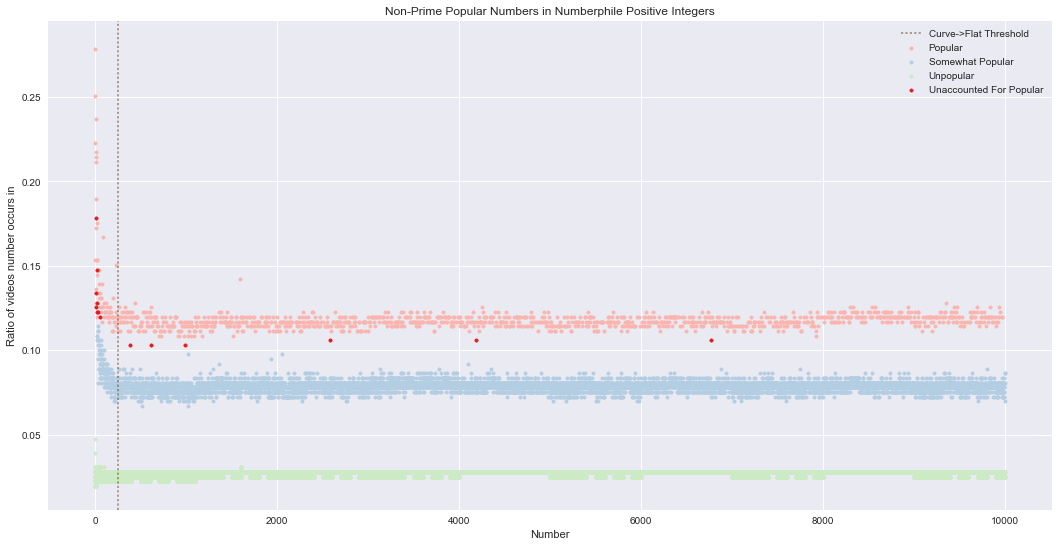

In [22]:
plt.scatter(numberphile_popular.number, numberphile_popular['pct'], marker='.', color=plt.cm.Pastel1.colors[0], label='Popular')
plt.scatter(numberphile_somewhat_popular.number, numberphile_somewhat_popular['pct'], marker='.', color=plt.cm.Pastel1.colors[1], label='Somewhat Popular')
plt.scatter(numberphile_unpopular.number, numberphile_unpopular['pct'], marker='.', color=plt.cm.Pastel1.colors[2], label='Unpopular')
plt.scatter(numberphile_popular_unaccounted.number, numberphile_popular_unaccounted['pct'], marker='.', color=plt.cm.Set1.colors[0], label='Unaccounted For Popular')
plt.axvline(x=250, linestyle='dotted', color=color, alpha=0.5, label='Curve->Flat Threshold')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Ratio of videos number occurs in')
plt.title('Non-Prime Popular Numbers in Numberphile Positive Integers')
plt.show()

It seems many of them occur for smaller numbers, before the curves level out (the dashed brown line).   For the ones in the flat part, it looks like all of the non-prime populars are the least popular of the popular. Just to confirm, below I look at the six least popular of the popular numbers. They should match the last six in the list of non-prime popular positive integers shown above.

In [23]:
print('Least popular of the popular numbers:')
display(HTML(numberphile_popular.sort_values(by='pct', ascending=True)[['number', 'pct']].iloc[:6].to_html(index=False)))

Least popular of the popular numbers:


number,pct
610.0,0.103064
377.0,0.103064
987.0,0.103064
6765.0,0.105850
4181.0,0.105850
2584.0,0.105850


Yes, they're a match! How close is the next least-popular of the popular integers is?

In [24]:
numberphile_popular.sort_values(by='pct', ascending=True)[['number', 'pct']].iloc[6]

number    919.000000
pct         0.108635
Name: 91900, dtype: float64

It turns out that there's a difference of 2.785 percentage points between those six unaccounted for "popular" numbers and the accounted for ones.  Perhaps this means the clustering algorithm picked a poor threshold.  However, they do look closer to the popular numbers than the semipopular numbers, so maybe they're popular but don't fall into any of those sets.  I wonder if they're popular in OEIS.

In [25]:
numberphile_popular_unaccounted_over_376 = numberphile_popular_unaccounted[numberphile_popular_unaccounted.number > 376]
numberphile_unaccounted_intersect_oeis = oeis_popular[oeis_popular.number.isin(numberphile_popular_unaccounted_over_376.number)]
print('Unaccounted for popular Numberphile numbers that are also popular in OEIS:')
print(numberphile_unaccounted_intersect_oeis.number.values)

Unaccounted for popular Numberphile numbers that are also popular in OEIS:
[2584. 4181. 6765.]


So the three larger numbers were popular in OEIS, but the other half weren't.  At this time, it's unclear what makes them popular.

## The Most Popular

So just who are the most popular positive integers in Numberphile?

In [26]:
numberphile_sorted = numberphile.sort_values(by='pct', ascending=False)
tenth_value = numberphile_sorted.iloc[9].pct
print(numberphile_sorted[numberphile_sorted.pct >= tenth_value][['number', 'count', 'pct']])

      number  count       pct
300      3.0    100  0.278552
200      2.0     90  0.250696
500      5.0     85  0.236769
100      1.0     80  0.222841
400      4.0     78  0.217270
700      7.0     77  0.214485
1300    13.0     76  0.211699
800      8.0     68  0.189415
600      6.0     64  0.178273
1700    17.0     63  0.175487


As with the OEIS data, numbers 1 - 8 are in the top ten most popular, but that's about where the similarity ends.  OEIS included 0 and 9, but Numberphile has 13 and 17 instead perhaps because of Numberphile's greater focus on primes (as discovered above).  It's also interesting that the numbers aren't mostly in sorted order like they were with OEIS.

## Featured Figures and Future Figuring

Some key findings:

- There are three popularity classes:
    - Popular: averaging 11.7% of videos, consist almost exclusively of prime numbers
    - Semipopular: averaging 7.84% of videos, consists of all integers that aren't popular
    - Unpopular: averaging 2.74% of videos, consisting of all non-integers
        - Dr. Haran, what do you have against the non-integers?
- Other than _primes_, none of the sets identified in previous work are good at predicting popularity in Numberphile videos

It's important to keep in mind the potential flaws in the data collection/annotation, which can bias the findings presented above:

- the data was collected to display facts in a child's calculator
- there was only one annotator

# Popular Numbers, Part 3: Matt Parker Breaks the Mould

Welcome to part four in a series examining the popularity of numbers featured in various math resources. [Last time](popular-02-numberphile), I looked at the popularity of positive rationals on the Numberphile YouTube channel.  In this post, I'll run similar analysis for the [standupmaths YouTube channel](https://www.youtube.com/user/standupmaths/), a channel where host "[[Matt Parker does] mathematics and stand-up. Sometimes simultaneously. Occasionally while being filmed. (It's quite the Venn diagram.)](https://www.youtube.com/user/standupmaths/about)".

In the graph below, we can see the popularity of just the standupmaths positive rationals.  Because there are only 98 videos, the granularity is too coarse to look at the ratios -- it wouldn't be clear if the gaps are from the coarse granularity or from a real gap.  So, so we'll look at raw counts instead of percentages (as was done previously in the OEIS and Numberphile graphs).

In [27]:
source = 'standupmaths'
standupmaths = df_positive_rational[df_positive_rational['source'] == source].copy()
color = colors[source]

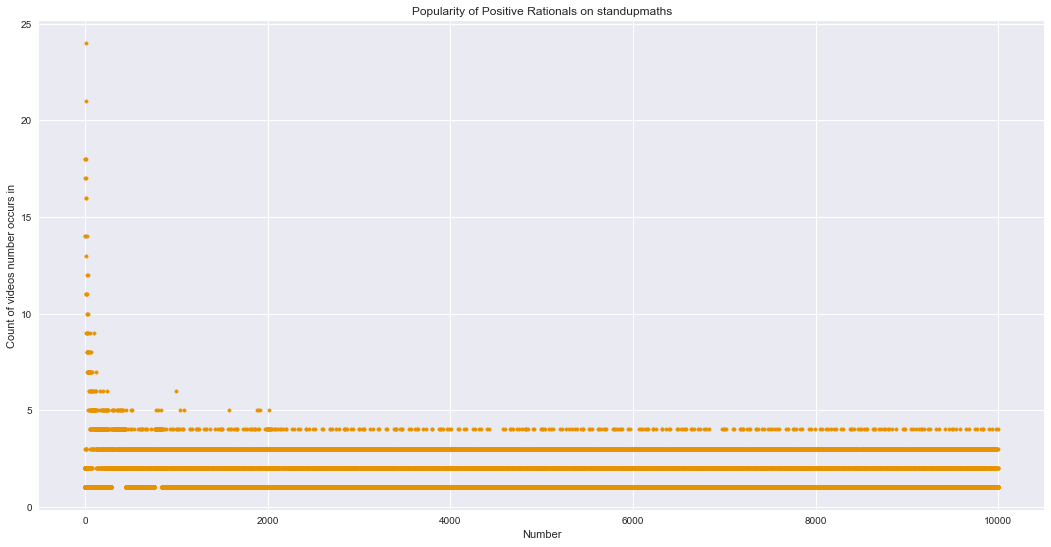

In [28]:
plt.scatter(standupmaths.number, standupmaths['count'], marker='.', color=color)
plt.xlabel('Number')
plt.ylabel('Count of videos number occurs in')
plt.title('Popularity of Positive Rationals on standupmaths')
plt.show()

Fascinating!  There aren't any gaps in this data.  Unlike OEIS and Numberphile, Matt appears to be an equal-opportunity number enthusiast.  Well, except that he also generally favors smaller numbers over larger numbers.

Still, I wonder where the non-integer rationals fall -- are they generally less common (as we saw in Numberphile videos)?  What about the prime numbers -- are they generally more popular (as they were in Numberphile videos)?

In [29]:
standupmaths_nonintegers = standupmaths[standupmaths.number % 1 != 0]
standupmaths_integers = standupmaths[standupmaths.number % 1 == 0].copy()

prior_work_set_names = tag_with_sets_from_prior_work(standupmaths_integers)

standupmaths_primes = standupmaths_integers[standupmaths_integers['primes']]
standupmaths_other = standupmaths_integers[~standupmaths_integers['primes']]

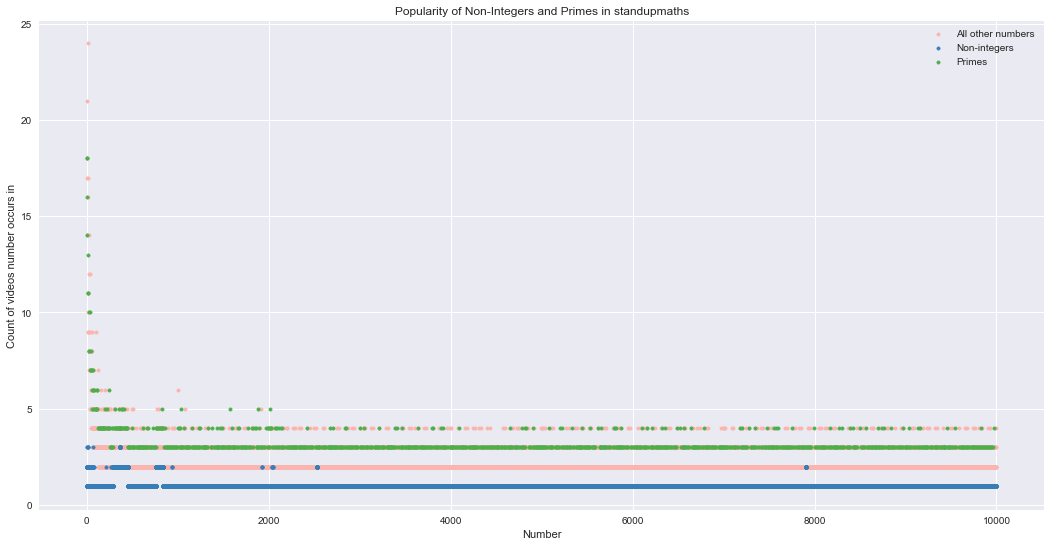

In [30]:
plt.scatter(standupmaths_other.number, standupmaths_other['count'], marker='.', c=plt.cm.Pastel1.colors[0], label='All other numbers')
plt.scatter(standupmaths_nonintegers.number, standupmaths_nonintegers['count'], marker='.', c=plt.cm.Set1.colors[1], label='Non-integers')
plt.scatter(standupmaths_primes.number, standupmaths_primes['count'], marker='.', c=plt.cm.Set1.colors[2], label='Primes')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Count of videos number occurs in')
plt.title('Popularity of Non-Integers and Primes in standupmaths')
plt.show()

So much for being equal-opportunity number enthusiast.  Matt also appears to prefer prime numbers (in green) over non-integers (in blue).  What about the other prior work sets?  The graph below shows all of the numbers belonging to the other prior work sets (i.e. all those except primes, since we just looked at those) in green compared to the rest of the numbers (in pale red).

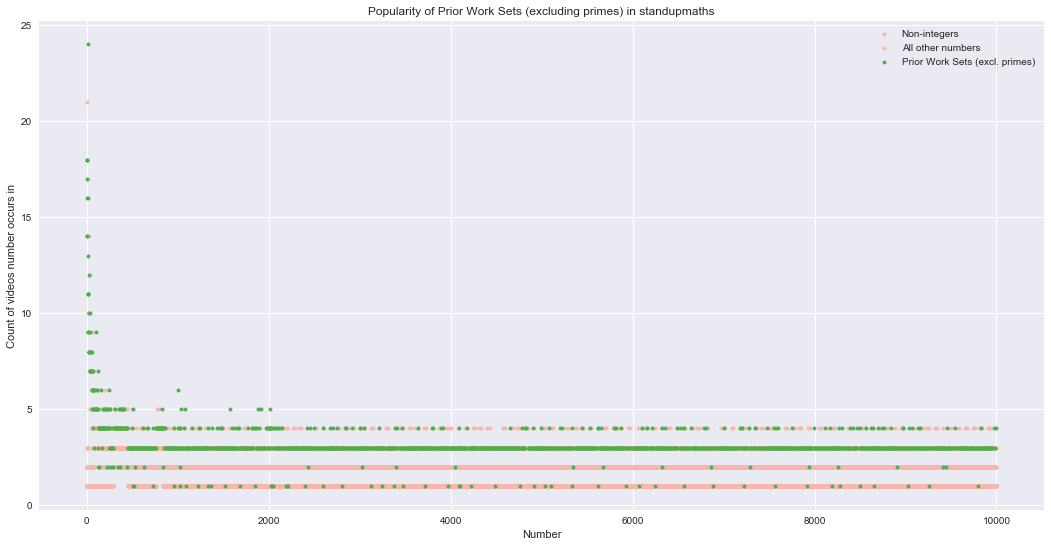

In [119]:
standupmaths_integers['unionPriorWorkWithoutPrimes'] = False
for set_name in prior_work_set_names:
    if set_name != 'primes':
        standupmaths_integers['unionPriorWorkWithoutPrimes'] |= standupmaths_integers[set_name]

df_int_others = standupmaths_integers[~standupmaths_integers['unionPriorWorkWithoutPrimes']]
df_int_prior_work_not_primes = standupmaths_integers[standupmaths_integers['unionPriorWorkWithoutPrimes']]

plt.scatter(standupmaths_nonintegers.number, standupmaths_nonintegers['count'], marker='.', c=plt.cm.Pastel1.colors[0], label='Non-integers')
plt.scatter(df_int_others.number, df_int_others['count'], marker='.', c=plt.cm.Pastel1.colors[0], label='All other numbers')
plt.scatter(df_int_prior_work_not_primes.number, df_int_prior_work_not_primes['count'], marker='.', c=plt.cm.Set1.colors[2], label='Prior Work Sets (excl. primes)')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Count of videos number occurs in')
plt.title('Popularity of Prior Work Sets (excluding primes) in standupmaths')
plt.show()

It appears that all of the prior work popular sets are generally good indicators of popularity in standupmaths.  So while there isn't a gap between popularity levels, some sets of numbers still seem to be more popular than others.

## The Most Popular

So just who are the most popular positive integers in standupmaths?

In [31]:
standupmaths_sorted = standupmaths.sort_values(by='pct', ascending=False)
tenth_value = standupmaths_sorted.iloc[9].pct
print(standupmaths_sorted[standupmaths_sorted.pct >= tenth_value][['number', 'count', 'pct']])

         number  count       pct
1010857    12.0     24  0.244898
1010257     6.0     21  0.214286
1010020     1.0     18  0.183673
1010157     5.0     18  0.183673
1010024     2.0     18  0.183673
1010657    10.0     17  0.173469
1010057     4.0     17  0.173469
1010457     8.0     16  0.163265
1010357     7.0     16  0.163265
1010002     0.0     14  0.142857
1011657    20.0     14  0.142857
1010051     3.0     14  0.142857


As with OEIS and Numberphile, we again see 1 - 8 are the most popular.  Standupmaths also includes zero among the most popular, just like OEIS.  Unlike OEIS and Numberphile, 12, 10, and 20 are among the most popular in standupmaths.  The numbers aren't generally in sorted order.

## Matt Parker: Venn Diagram Man

Like his channel, Matt Parker is quite the Venn diagram.  Not only is he the host on standupmaths, but he's also the second-most-frequent contributor on Numberphile, hosting 45/359 (12.5%) of videos.

![Venn diagram showing frequent hosts of Numberphile and standupmaths.  Matt Parker is in the intersection.](images/np_sum-hosts-venn-diagram.png)

What if we consider combining Matt's Numberphile videos with his standupmaths videos, since he (presumably) had some say in what numbers were featured in both.

In [32]:
parker = pd.read_sql_query('''SELECT C.real_part AS number, COUNT(*) AS count
                              FROM counts C, hosts H
                              WHERE C.imag_part == 0 AND
                                    C.video_id = H.video_id AND
                                    0 <= C.real_part AND
                                    C.real_part <= 10000 AND
                                    H.host = "Matt Parker"
                              GROUP BY C.real_part''',
                           conn)

In [33]:
df_hosts_counts = pd.read_sql_query('''SELECT H.host, V.source, COUNT(*) AS count
                                       FROM hosts H, videos V
                                       WHERE H.video_id = V.video_id
                                       GROUP BY H.host, V.source''',
                                    conn, index_col='host')
print('How many videos Matt has hosted, by source:\n', df_hosts_counts.loc['Matt Parker'])
total_parker_videos = df_hosts_counts.loc['Matt Parker']['count'].sum()
parker['pct'] = parker.apply(lambda row: row['count']/total_parker_videos, axis=1)

How many videos Matt has hosted, by source:
                    source  count
host                            
Matt Parker   Numberphile     45
Matt Parker  standupmaths     98


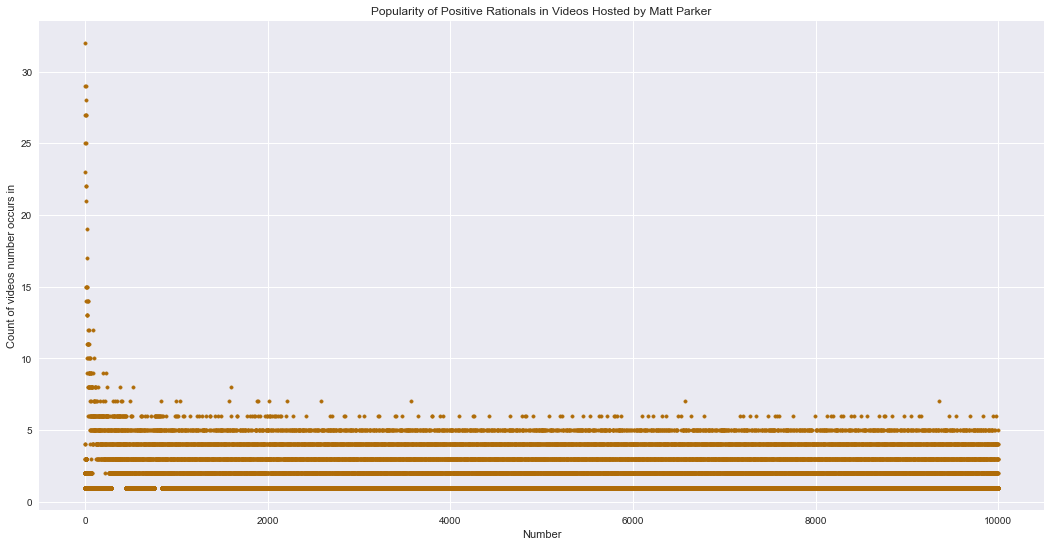

In [34]:
color = '#af6c08'
plt.scatter(parker.number, parker['count'], marker='.', color=color)
plt.xlabel('Number')
plt.ylabel('Count of videos number occurs in')
plt.title('Popularity of Positive Rationals in Videos Hosted by Matt Parker')
plt.show()

There doesn't appear to be much of a difference between all the Matt Parker videos and just the standupmaths videos -- there's certainly no obvious gap.  Are the most popular numbers also similar?

In [35]:
parker_sorted = parker.sort_values(by='pct', ascending=False)
tenth_value = parker_sorted.iloc[9].pct
print(parker_sorted[parker_sorted.pct >= tenth_value][['number', 'count', 'pct']])

     number  count       pct
25      2.0     32  0.223776
20      1.0     29  0.202797
858    12.0     29  0.202797
258     6.0     28  0.195804
158     5.0     27  0.188811
358     7.0     27  0.188811
52      3.0     27  0.188811
58      4.0     25  0.174825
458     8.0     25  0.174825
0       0.0     23  0.160839


The most popular numbers seem similar in some ways (such as including 0 - 8 and 12) but different in others (the order is different).

## A Small Sample Problem?

Compared to OEIS and Numberphile, standupmaths seems to focus on all positive rationals approximately equally.  It also has the fewest number of videos -- just 98 compared to 359 for all of Numberphile and hundreds of thousands of sequences for OEIS.  It's possible that a popularity gap just doesn't appear when you have a small number of videos.  Let's see if that's the case.

The graphs below are all 98-video/sequence subsets of Numberphile and OEIS data.  I try a couple of different subsets:
- The chronologically first 98 Numberphile videos (which includes some hosted by Matt)
- The chronologically first 98 Numberphile videos that weren't hosted by Matt
- 98 randomly-selected Numberphile videos that weren't hosted by Matt
- 98 randomly-selected OEIS sequences
    - Unfortunately, there's no simple way to get the first 98 OEIS sequences.  From the [OEIS page on A-numbers](https://oeis.org/wiki/A-numbers): "When N. J. A. Sloane's initial collection of sequences reached a few hundred, in the 1960's, he sorted them in lexicographic order," then assigned A-numbers in sorted order.  Thus, not only are the lower A-numbers not in sorted order, but there's a bias in the terms of the first 143 sequences (i.e. they're likely to contain smaller numbers).

For those randomly-selected subsets, I try a few different random selections, in case there's anything special about those random selections.

In [122]:
import time

def reformat_date(d):
    ts = time.strptime(d, '%b %d, %Y')
    return time.strftime('%Y-%m-%d', ts)

def get_counts_by_video_ids(video_ids, df_of_all_numbers=numberphile, df_num_colname='number'):
    video_counts = pd.read_sql_query('''SELECT C.real_part AS number, COUNT(*) AS count
                                        FROM counts C, videos V
                                        WHERE C.imag_part == 0 AND
                                              C.video_id = V.video_id AND
                                              0 <= C.real_part AND
                                              C.real_part <= 10000 AND
                                              V.video_id IN ''' + str(video_ids) + '''
                                        GROUP BY C.real_part''',
                                     conn)
    df_of_all_numbers = df_of_all_numbers[df_num_colname].to_frame()
    video_counts = video_counts.merge(df_of_all_numbers, how='right', on=df_num_colname).fillna(0)
    return video_counts

def get_earliest_k_videos(get_videos_sql, k, df_of_all_numbers=numberphile, df_num_colname='number'):
    video_dates = pd.read_sql_query(get_videos_sql, conn)
    video_dates['iso_date'] = video_dates.date.apply(reformat_date)
    video_dates = video_dates.sort_values(by='iso_date', ascending=True)
    
    top_k = video_dates.iloc[:k]
    return get_counts_by_video_ids(tuple(top_k.video_id), df_of_all_numbers, df_num_colname)


samples = [('standupmaths', standupmaths, False)]
df = get_earliest_k_videos('''SELECT video_id, date
                              FROM videos
                              WHERE source="Numberphile"''',
                           98)
samples.append(('First 98 Numberphile videos', df, False))

parkerless_np_videos_sql = '''SELECT V1.video_id, V1.date
                              FROM videos V1
                              WHERE V1.source='Numberphile' AND
                                    V1.video_id NOT IN (
                                      SELECT DISTINCT(V2.video_id)
                                      FROM videos V2, hosts H
                                      WHERE V2.source='Numberphile' AND
                                          H.host='Matt Parker' AND 
                                          V2.video_id=H.video_id)'''
df = get_earliest_k_videos(parkerless_np_videos_sql, 143)
samples.append(('First 98 Numberphile videos without Matt Parker', df, False))

oeis_a_nums = pd.read_sql_query('SELECT video_id FROM videos WHERE source="OEIS"', conn).video_id
samples_log = []
for i in range(3):
    df = get_counts_by_video_ids(tuple(oeis_a_nums.sample(98, random_state=i)), oeis)
    samples.append(('OEIS Random Subset '+str(i), df, False))
    samples_log.append(('OEIS Random Subset '+str(i)+' logscale', df, True))
samples += samples_log

np_video_ids = pd.read_sql_query(parkerless_np_videos_sql, conn).video_id
for i in range(3):
    df = get_counts_by_video_ids(tuple(np_video_ids.sample(98, random_state=i)))
    samples.append(('Numberphile Random Subset '+str(i)+' without Matt Parker', df, False))

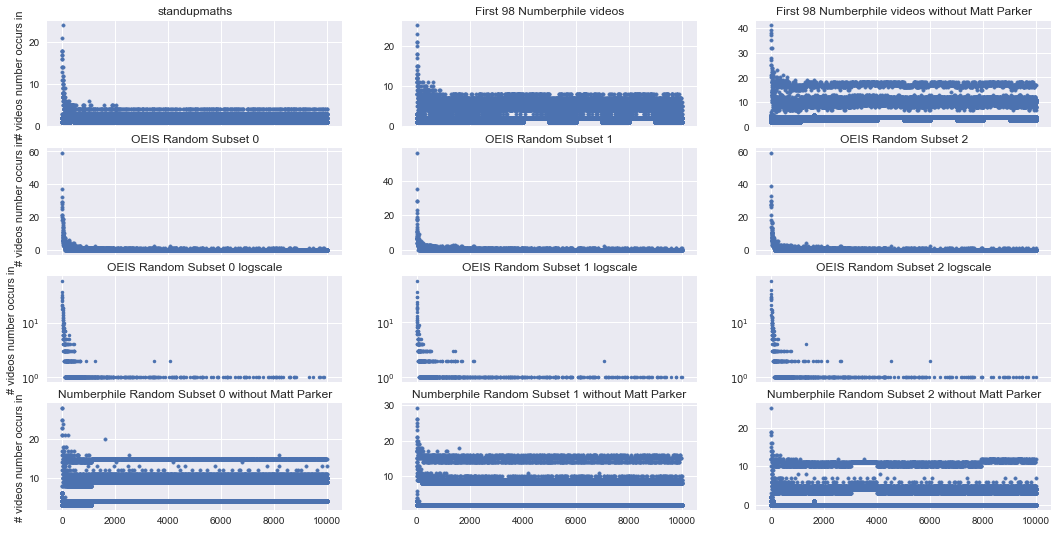

In [123]:
fig, axes = plt.subplots(len(samples)//3, 3, sharex=True)

for i, sample in enumerate(samples):
    row, col = divmod(i, 3)
    ax = axes[row][col]
    title, df, special_plot_type = sample
    if special_plot_type is True:
        ax.semilogy(df.number, df['count'], marker='.', linestyle='')
    else:
        ax.scatter(df.number, df['count'], marker='.')
    if col == 0:
        ax.set_ylabel('# videos number occurs in')
    if row == len(samples):
        ax.set_xlabel('Number')
    
    ax.set_title(title)

plt.show()

There are some interesting patterns jumping out here.  Numberphile appears to have three levels of popularity, even at just 98 videos.  However, the distinction between popularity is much less when looking at the first 98 Numberphile videos (that include any hosted by Parker).  OEIS, however, seems to lose its  two levels of popularity.  The general popularity of numbers in the OEIS data is also *much* lower than both Numberphile and standupmaths.

So there definitely appears to be a difference in popularity across the sources, but this post is about standupmaths and Matt Parker, not a comparison of the three sources -- that's another post.  So, let's return to standupmaths.  The key takeaway seems to be that even at low sample sizes there *could* be different levels of popularity.  It's interesting that standupmaths doesn't seem to have them.  In fact, when looking at the first 98 Numberphile videos that include any hosted by Parker, the gaps start disappearing.

Thus is seems that **Matt Parker is a "Friend to All Numbers"**.

## Analysis of Parker Squares

Matt's known to not let correctness stand in the way of good math (err, "maths") fun.  He champions, "giving things a go", even when you don't exactly succeed [[The Parker Square](https://www.youtube.com/watch?v=aOT_bG-vWyg)].  Dr. Haran (creator, producer of Numberphile) has coined the term "Parker Square" to describe this phenomena and often uses it to label mistakes.  Since "Parker Square" has been coined (in April 2016), have there been more Parker Squares on Numberphile?

In [ ]:
import test_facts
filename = 'resources/youtube_facts.py'
facts_lib = test_facts.get_loader_lib(filename)
facts = facts_lib.load_facts()

numberphile_facts = [f for f in facts if f.source == 'Numberphile']
for f in numberphile_facts:
    f.date = reformat_date(f.date)

test_case = test_facts.convert_test_case({'formula' : '1/0'})
parker_squares = [f for f in numberphile_facts if f.test(*test_case)]
assert(len(parker_squares) == len(set([f.link for f in parker_squares])))

all_before_ps = [f for f in numberphile_facts if f.date < '2016-04-18']
before_ps = [f for f in parker_squares if f.date < '2016-04-18']
before_ps_pct = len(before_ps) / len(all_before_ps)
print('Errors before "Parker Square" was coined: %d / %d = %0.2f%%' % (len(before_ps), len(all_before_ps), before_ps_pct*100))

all_after_ps = [f for f in numberphile_facts if f.date > '2016-04-18']
after_ps = [f for f in parker_squares if f.date > '2016-04-18']
after_ps_pct = len(before_ps) / len(all_after_ps)
print('Errors after "Parker Square" was coined: %d / %d = %0.2f%%' % (len(after_ps), len(all_after_ps), after_ps_pct*100))